<center>
<img src="https://cdn.discordapp.com/attachments/1137185853039456308/1156826522733252639/image.png?ex=65166227&is=651510a7&hm=1624b27b8fe248f5ca60cad2458743786fbcb195cc417196b1474a72aecdf5e2&">
    
##  QuantumQuipu Workshops #1


Autores: [Ricardo Angelo Quispe Mendizábal](https://github.com/RcrdPhysics).\
Institución: QuantumQuipu & Universidad Nacional Mayor de San Marcos\
Correo: ricardo.quispe5@unmsm.edu.pe
    
Este material está sujeto a los términos y condiciones de la licencia [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Se permite el uso gratuito para cualquier propósito no comercial.

*También puede consultar la última versión de este notebook en nuestro [repositorio](https://github.com/QuantumWorkshops/) y los videos de los workshops [en nuestro canal de Youtube](https://www.youtube.com/@quantumquipu-unmsm1091/streams).*
    

# <center> QQW1. From Einstein's Field Equation to 1+1 Gravitational Waves | Simulation on evolution and detection

## Outline
1. [Evolution](#1-Evolution)
2. [Detection](#2-Evolution)

## Evolution

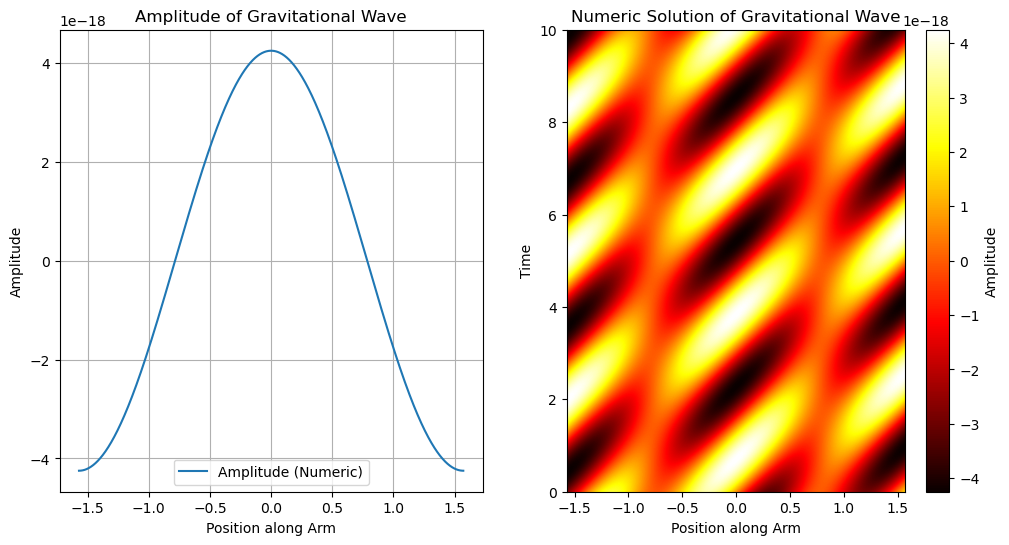

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la onda gravitacional
A = 1.0  # Amplitud
k = 2.0  # Número de onda espacial
omega = 2.0  # Frecuencia angular

# Parámetros numéricos
t_max = 10.0  # Tiempo máximo
x_min = -np.pi/2  # Posición mínima
x_max = np.pi/2   # Posición máxima
N_t = 1000  # Número de pasos de tiempo
N_x = 1000  # Número de puntos de posición

# Discretización del tiempo y la posición
t_values = np.linspace(0, t_max, N_t)
x_values = np.linspace(x_min, x_max, N_x)

# Paso en el tiempo y en la posición
dt = t_values[1] - t_values[0]
dx = x_values[1] - x_values[0]

# Inicialización de la amplitud y fase
h_amplitude = A * np.cos(k * x_values)
h_phase = -omega * t_values

# Método de Runge-Kutta de cuarto orden para evolucionar la amplitud y fase en el tiempo
for i in range(1, N_t):
    k1a = -h_amplitude * omega**2 * dt
    k1p = k * dt
    k2a = -(h_amplitude + 0.5*k1a) * omega**2 * dt
    k2p = k * (dt + 0.5*k1p)
    k3a = -(h_amplitude + 0.5*k2a) * omega**2 * dt
    k3p = k * (dt + 0.5*k2p)
    k4a = -(h_amplitude + k3a) * omega**2 * dt
    k4p = k * (dt + k3p)
    h_amplitude += (k1a + 2*k2a + 2*k3a + k4a) / 6
    h_phase += (k1p + 2*k2p + 2*k3p + k4p) / 6

# Solución numérica
h_numeric = h_amplitude * np.cos(k * x_values - omega * t_values[:, np.newaxis] + h_phase)

# Graficar la solución numérica y la analítica
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x_values, h_amplitude, label='Amplitude (Numeric)')
plt.xlabel('Position along Arm')
plt.ylabel('Amplitude')
plt.title('Amplitude of Gravitational Wave')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.imshow(h_numeric, extent=[x_min, x_max, 0, t_max], aspect='auto', cmap='hot')
plt.colorbar(label='Amplitude')
plt.xlabel('Position along Arm')
plt.ylabel('Time')
plt.title('Numeric Solution of Gravitational Wave')
plt.show()


### Numerical/Analitical comparisons:

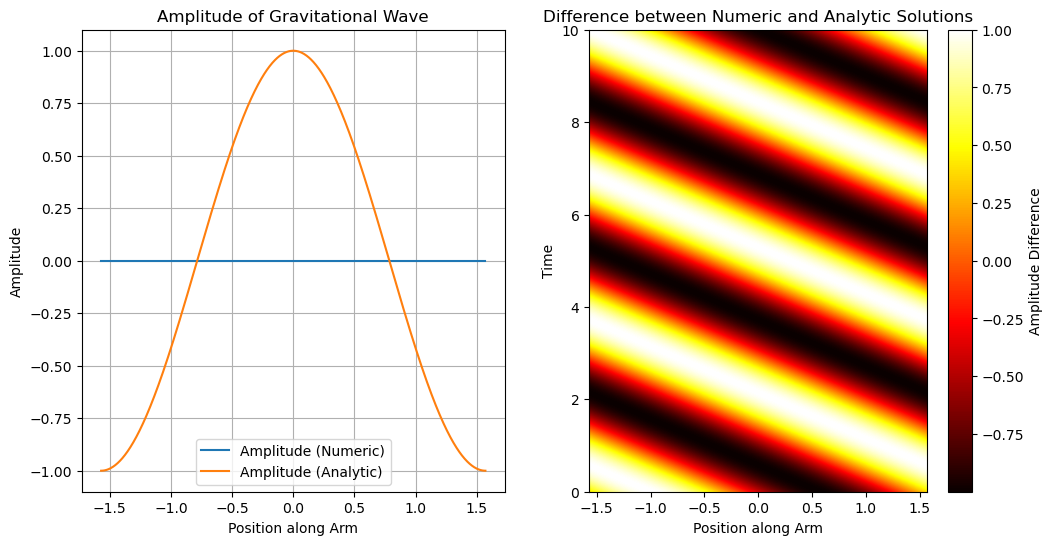

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la onda gravitacional
A = 1.0  # Amplitud
k = 2.0  # Número de onda espacial
omega = 2.0  # Frecuencia angular

# Parámetros numéricos
t_max = 10.0  # Tiempo máximo
x_min = -np.pi/2  # Posición mínima
x_max = np.pi/2   # Posición máxima
N_t = 1000  # Número de pasos de tiempo
N_x = 1000  # Número de puntos de posición

# Discretización del tiempo y la posición
t_values = np.linspace(0, t_max, N_t)
x_values = np.linspace(x_min, x_max, N_x)

# Método de Runge-Kutta de cuarto orden para evolucionar la amplitud y fase en el tiempo
dt = t_values[1] - t_values[0]
dx = x_values[1] - x_values[0]

# Inicialización de la amplitud y fase
h_amplitude = A * np.cos(k * x_values)
h_phase = -omega * t_values

# Solución numérica
for i in range(1, N_t):
    k1a = -h_amplitude * omega**2 * dt
    k1p = k * dt
    k2a = -(h_amplitude + 0.5*k1a) * omega**2 * dt
    k2p = k * (dt + 0.5*k1p)
    k3a = -(h_amplitude + 0.5*k2a) * omega**2 * dt
    k3p = k * (dt + 0.5*k2p)
    k4a = -(h_amplitude + k3a) * omega**2 * dt
    k4p = k * (dt + k3p)
    h_amplitude += (k1a + 2*k2a + 2*k3a + k4a) / 6
    h_phase += (k1p + 2*k2p + 2*k3p + k4p) / 6

# Solución analítica
h_analytic = A * np.cos(k * x_values - omega * t_values[:, np.newaxis])

# Graficar la solución numérica y la analítica
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x_values, h_amplitude, label='Amplitude (Numeric)')
plt.plot(x_values, A * np.cos(k * x_values), label='Amplitude (Analytic)')
plt.xlabel('Position along Arm')
plt.ylabel('Amplitude')
plt.title('Amplitude of Gravitational Wave')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.imshow(h_amplitude * np.cos(k * x_values - omega * t_values[:, np.newaxis]) - h_analytic, extent=[x_min, x_max, 0, t_max], aspect='auto', cmap='hot')
plt.colorbar(label='Amplitude Difference')
plt.xlabel('Position along Arm')
plt.ylabel('Time')
plt.title('Difference between Numeric and Analytic Solutions')
plt.show()


## LIGO Detection

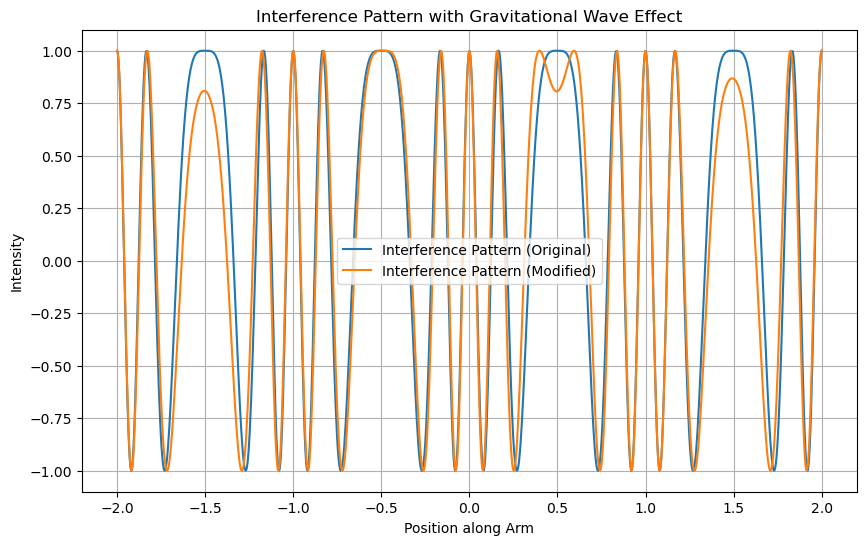

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la onda gravitacional y del experimento
A = 1.0  # Amplitud de la onda gravitacional
k = 2.0  # Número de onda espacial
omega = 2.0  # Frecuencia angular de la onda

# Parámetros del experimento LIGO
initial_arm_length = 1.0  # Longitud inicial de los brazos del interferómetro
wave_speed = 1.0  # Velocidad de la onda gravitacional

# Tiempo y espacio
t = np.linspace(0, 10, 1000)  # Tiempo
x = np.linspace(-2, 2, 1000)  # Posición a lo largo del brazo

# Simulación de la onda gravitacional
h = A * np.cos(k * x - omega * t[:, np.newaxis])

# Simulación del cambio en la longitud del brazo debido a la onda gravitacional
arm_length = initial_arm_length + h / wave_speed

# Patrón de interferencia
interference_pattern = np.cos(2 * np.pi * initial_arm_length * np.sin(np.pi * x / initial_arm_length) * omega)

# Simulación del patrón de interferencia modificado
interference_pattern_mod = np.cos(2 * np.pi * arm_length.mean(axis=0) * np.sin(np.pi * x / initial_arm_length) * omega)

# Graficar el patrón de interferencia
plt.figure(figsize=(10, 6))
plt.plot(x, interference_pattern, label='Interference Pattern (Original)')
plt.plot(x, interference_pattern_mod, label='Interference Pattern (Modified)')
plt.xlabel('Position along Arm')
plt.ylabel('Intensity')
plt.title('Interference Pattern with Gravitational Wave Effect')
plt.legend()
plt.grid(True)
plt.show()

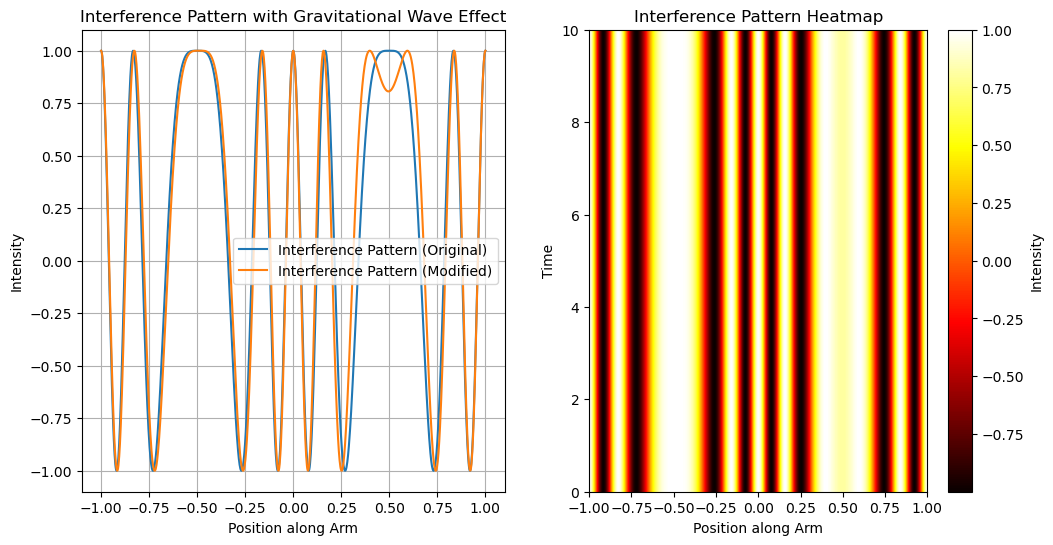

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la onda gravitacional y del experimento
A = 1.0  # Amplitud de la onda gravitacional
k = 2.0  # Número de onda espacial
omega = 2.0  # Frecuencia angular de la onda

# Parámetros del experimento LIGO
initial_arm_length = 1.0  # Longitud inicial de los brazos del interferómetro
wave_speed = 1.0  # Velocidad de la onda gravitacional

# Tiempo y espacio
t = np.linspace(0, 10, 1000)  # Tiempo
x = np.linspace(-1, 1, 1000)  # Posición a lo largo del brazo

# Simulación de la onda gravitacional
h = A * np.cos(k * x - omega * t[:, np.newaxis])

# Simulación del cambio en la longitud del brazo debido a la onda gravitacional
arm_length = initial_arm_length + h / wave_speed

# Patrón de interferencia
interference_pattern = np.cos(2 * np.pi * initial_arm_length * np.sin(np.pi * x / initial_arm_length) * omega)

# Simulación del patrón de interferencia modificado
interference_pattern_mod = np.cos(2 * np.pi * arm_length.mean(axis=0) * np.sin(np.pi * x / initial_arm_length) * omega)

# Crear un heatmap para la visualización
heatmap_data = np.tile(interference_pattern_mod, (len(t), 1))

# Graficar el patrón de interferencia con heatmap
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x, interference_pattern, label='Interference Pattern (Original)')
plt.plot(x, interference_pattern_mod, label='Interference Pattern (Modified)')
plt.xlabel('Position along Arm')
plt.ylabel('Intensity')
plt.title('Interference Pattern with Gravitational Wave Effect')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.imshow(heatmap_data, extent=[x.min(), x.max(), t.min(), t.max()], aspect='auto', cmap='hot')
plt.colorbar(label='Intensity')
plt.xlabel('Position along Arm')
plt.ylabel('Time')
plt.title('Interference Pattern Heatmap')
plt.show()


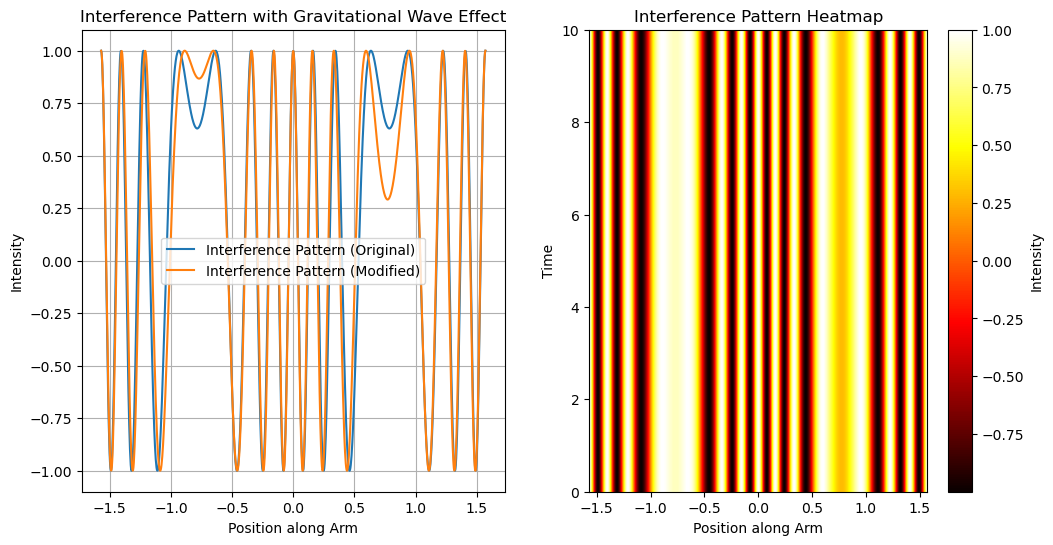

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la onda gravitacional y del experimento
A = 1.0  # Amplitud de la onda gravitacional
k = 2.0  # Número de onda espacial
omega = 2.0  # Frecuencia angular de la onda

# Parámetros del experimento LIGO
initial_arm_length = np.pi / 2  # Longitud inicial de los brazos del interferómetro (-pi/2 a pi/2)
wave_speed = 1.0  # Velocidad de la onda gravitacional

# Tiempo y espacio
t = np.linspace(0, 10, 1000)  # Tiempo
x = np.linspace(-np.pi/2, np.pi/2, 1000)  # Posición a lo largo del brazo (-pi/2 a pi/2)

# Simulación de la onda gravitacional
h = A * np.cos(k * x - omega * t[:, np.newaxis])

# Simulación del cambio en la longitud del brazo debido a la onda gravitacional
arm_length = initial_arm_length + h / wave_speed

# Patrón de interferencia
interference_pattern = np.cos(2 * np.pi * initial_arm_length * np.sin(np.pi * x / initial_arm_length) * omega)

# Simulación del patrón de interferencia modificado
interference_pattern_mod = np.cos(2 * np.pi * arm_length.mean(axis=0) * np.sin(np.pi * x / initial_arm_length) * omega)

# Crear un heatmap para la visualización
heatmap_data = np.tile(interference_pattern_mod, (len(t), 1))

# Graficar el patrón de interferencia con heatmap
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x, interference_pattern, label='Interference Pattern (Original)')
plt.plot(x, interference_pattern_mod, label='Interference Pattern (Modified)')
plt.xlabel('Position along Arm')
plt.ylabel('Intensity')
plt.title('Interference Pattern with Gravitational Wave Effect')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.imshow(heatmap_data, extent=[x.min(), x.max(), t.min(), t.max()], aspect='auto', cmap='hot')
plt.colorbar(label='Intensity')
plt.xlabel('Position along Arm')
plt.ylabel('Time')
plt.title('Interference Pattern Heatmap')
plt.show()


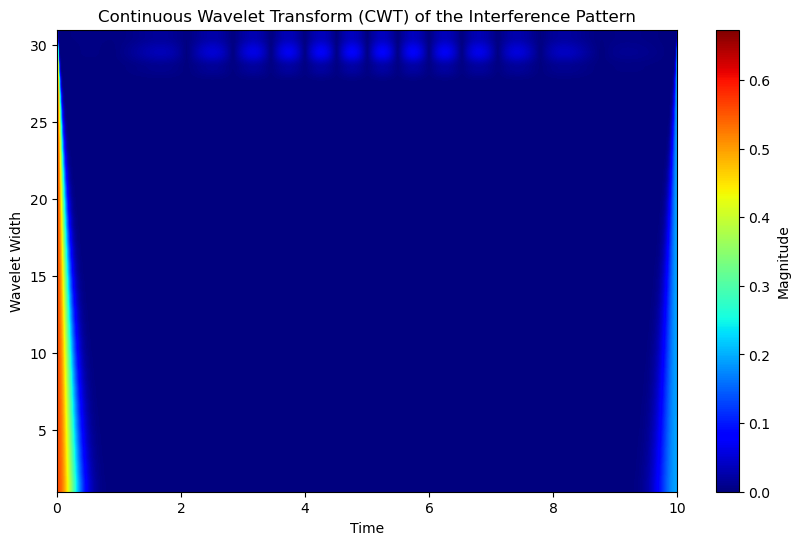

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import cwt, morlet

# Parámetros de la onda gravitacional y del experimento
A = 1.0  # Amplitud de la onda gravitacional
k = 2.0  # Número de onda espacial
omega = 2.0  # Frecuencia angular de la onda

# Parámetros del experimento LIGO
initial_arm_length = np.pi / 2  # Longitud inicial de los brazos del interferómetro (-pi/2 a pi/2)
wave_speed = 1.0  # Velocidad de la onda gravitacional

# Tiempo y espacio
t = np.linspace(0, 10, 1000)  # Tiempo
x = np.linspace(-np.pi/4, np.pi/4, 1000)  # Posición a lo largo del brazo (-pi/2 a pi/2)

# Simulación de la onda gravitacional
h = A * np.cos(k * x - omega * t[:, np.newaxis])

# Simulación del cambio en la longitud del brazo debido a la onda gravitacional
arm_length = initial_arm_length + h / wave_speed

# Patrón de interferencia
interference_pattern_mod = np.cos(2 * np.pi * arm_length.mean(axis=0) * np.sin(np.pi * x / initial_arm_length) * omega)

# Calcular la Continuous Wavelet Transform (CWT)
widths = np.arange(1, 31)  # Anchura de las wavelets
cwt_result = cwt(interference_pattern_mod, morlet, widths)

# Graficar la Continuous Wavelet Transform (CWT)
plt.figure(figsize=(10, 6))
plt.imshow(np.abs(cwt_result), extent=[t.min(), t.max(), 1, 31], cmap='jet', aspect='auto')
plt.colorbar(label='Magnitude')
plt.xlabel('Time')
plt.ylabel('Wavelet Width')
plt.title('Continuous Wavelet Transform (CWT) of the Interference Pattern')
plt.show()


## Donaciones
<br>
<center>
Puedes donar una vez en el siguiente enlace (Ko-Fi):

<br>
    
*Click en la imagen.*

<a href="https://ko-fi.com/rcrdphysics">
<img src="https://habrastorage.org/webt/8r/ml/xf/8rmlxfpdzukegpxa62cxlfvgkqe.png" width=20% />

</center>